In [3]:
from vacation.model import VCNN
from vacation.data import GalaxyDataset
import numpy as np
import torch

import matplotlib.pyplot as plt

rng = np.random.default_rng(1337)

In [4]:
train_ds = GalaxyDataset(
    path="/scratch/tgross/vacation_data/Galaxy10_DECals_train.h5",
    device="cuda:1",
    max_cache_size="15G",
    cache_loaded=True,
    index_collection=rng.integers(0, 16813, 10000),
)

In [5]:
valid_ds = GalaxyDataset(
    path="/scratch/tgross/vacation_data/Galaxy10_DECals_valid.h5",
    device="cuda:1",
    max_cache_size="4G",
    cache_loaded=True,
    index_collection=rng.integers(0, 4204, 400),
)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='Classes', ylabel='Counts'>)

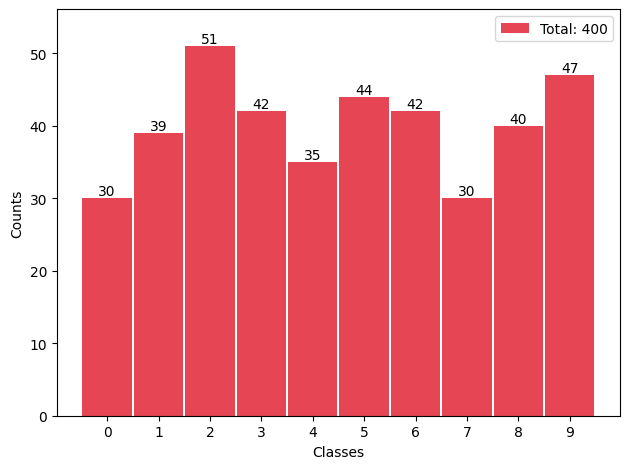

In [6]:
valid_ds.plot_distribution()

In [24]:
str(model._loss_func.__class__.__name__)

'CrossEntropyLoss'

In [26]:
getattr(torch.nn, model._activation_func.__name__)

torch.nn.modules.activation.PReLU

In [7]:
model = VCNN.load(
    path=".models/model_full_v2_2.pt",
    optimizer=torch.optim.AdamW, 
    activation_func=torch.nn.PReLU, 
    loss_func=torch.nn.CrossEntropyLoss,
    relative_to_package=True
)

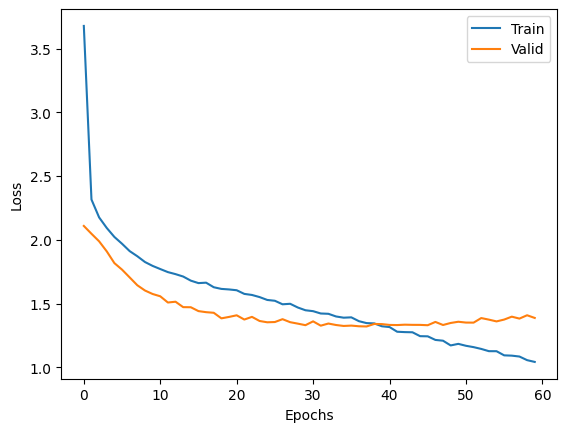

In [16]:
plt.plot(model._loss_metric.train_vals, label="Train")
plt.plot(model._loss_metric.valid_vals, label="Valid")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

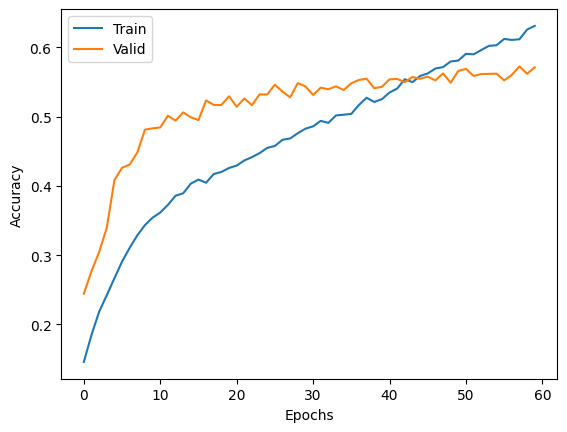

In [17]:
plt.plot(model._metrics["accuracy"].train_vals, label="Train")
plt.plot(model._metrics["accuracy"].valid_vals, label="Valid")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay
from tqdm.auto import tqdm

In [14]:
model.model.eval()
y_pred = torch.Tensor([model(valid_ds[int(img)][0][None]).argmax() for img in tqdm(np.arange(0, 400))])

  0%|          | 0/400 [00:00<?, ?it/s]

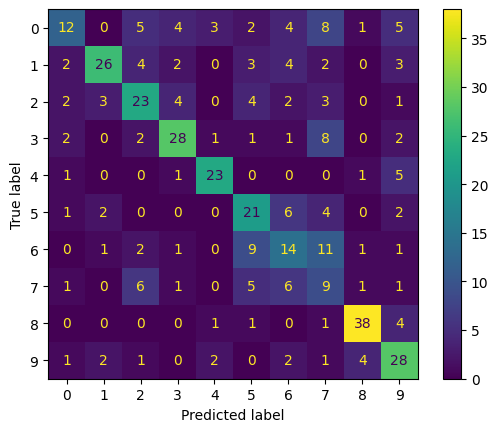

In [16]:
cmatrix = ConfusionMatrixDisplay.from_predictions(y_pred=y_pred.cpu().numpy(), y_true=valid_ds.get_labels().cpu().numpy())

In [19]:
print(str(model.model))

Sequential(
  (0): Conv2d(3, 4, kernel_size=(3, 3), stride=(1, 1))
  (1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): PReLU(num_parameters=1)
  (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): Dropout2d(p=0.5, inplace=False)
  (5): Conv2d(4, 6, kernel_size=(3, 3), stride=(1, 1))
  (6): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): PReLU(num_parameters=1)
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Dropout2d(p=0.5, inplace=False)
  (10): Flatten(start_dim=1, end_dim=-1)
  (11): LazyLinear(in_features=0, out_features=100, bias=True)
  (12): PReLU(num_parameters=1)
  (13): Dropout(p=0.5, inplace=False)
  (14): Linear(in_features=100, out_features=10, bias=True)
)


In [10]:
print(str(model.model))

Sequential(
  (0): Conv2d(3, 4, kernel_size=(3, 3), stride=(1, 1))
  (1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): PReLU(num_parameters=1)
  (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): Dropout2d(p=0.4, inplace=False)
  (5): Conv2d(4, 6, kernel_size=(3, 3), stride=(1, 1))
  (6): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): PReLU(num_parameters=1)
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Dropout2d(p=0.4, inplace=False)
  (10): Flatten(start_dim=1, end_dim=-1)
  (11): LazyLinear(in_features=0, out_features=300, bias=True)
  (12): PReLU(num_parameters=1)
  (13): Dropout(p=0.4, inplace=False)
  (14): Linear(in_features=300, out_features=10, bias=True)
)
